### **1. Import Library**

In [2]:
import pandas as pd # Manipulasi data
from sklearn.cluster import KMeans # Untuk klasterisasi
from sklearn.preprocessing import StandardScaler # Normalisasi
from sklearn.metrics import silhouette_score # Evaluasi Model
from sklearn.decomposition import PCA # Reduksi Dimensi untuk Visualisasi
import matplotlib.pyplot as plt # Visualisasi
import seaborn as sns # Visualisasi
import joblib # Menyimpan Model

In [3]:
#Menghubungkan Gdrive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Untuk membaca dataset yang ada di Gdrive
file_path = "/content/drive/MyDrive/Machine Learning/dataset.xlsx"
df = pd.read_excel(file_path, sheet_name="ALL", skiprows=2)

In [5]:
# Menampilkan 5 dataset
df.head()

,NO,Usia,Jenis Kelamin,Apakah anda sering mengalami sakit kepala?,Apakah Anda selalu kurang nafsu makan?,Apakah tidur anda kurang nyenyak?,Apakah anda merasa takut?,Apakah tangan Anda gemetaran?,"Apakah anda merasa gugup, tegang, atau khawatir?",Apakah pencernaan Anda kurang baik?,...,Apakah pekerjaan sehari-hari terasa sebagai beban yang menyulitkan?,Apakah Anda tidak dapat berguna dalam kehidupan sehari-hari?,Apakah Anda kehilangan minat terhadap berbagai hal?,Apakah Anda merasa sebagai orang yang tidak berharga?,Apakah Anda pernah berpikir mengenai bunuh diri?,Apakah Anda merasa lelah sepanjang waktu?,Apakah Anda Anda mempunyai keluhan tidak nyaman pada bagian perut?,Apakah Anda mudah merasa lelah?,Apakah anda mengalami kembali peristiwa banjir (misal dalam bentuk bayangan atau mimpi),TOTAL YA
0,1,18,P,1,1,1,1,0,1,0.0,...,1,0.0,1,1,1,1,1,1,0.0,16.0
1,2,16,P,0,0,1,1,0,1,0.0,...,0,0.0,0,0,0,0,0,1,1.0,7.0
2,3,17,P,0,1,1,1,1,1,0.0,...,0,0.0,0,0,0,0,0,1,0.0,7.0
3,4,16,P,0,1,0,0,0,0,1.0,...,0,0.0,0,0,0,0,1,1,0.0,7.0
4,5,17,P,0,0,0,1,0,0,0.0,...,0,0.0,0,0,0,0,1,0,0.0,6.0


In [6]:
# Nilai unik setiap kolom
df.nunique()

,0
NO,150
Usia,5
Jenis Kelamin,2
Apakah anda sering mengalami sakit kepala?,2
Apakah Anda selalu kurang nafsu makan?,2
Apakah tidur anda kurang nyenyak?,2
Apakah anda merasa takut?,2
Apakah tangan Anda gemetaran?,2
"Apakah anda merasa gugup, tegang, atau khawatir?",2
Apakah pencernaan Anda kurang baik?,2


### Menangani Missing Value

In [7]:
# Cek Missing Values
print("Missing Values per Kolom:")
df.isnull().sum()

Missing Values per Kolom:


,0
NO,0
Usia,0
Jenis Kelamin,0
Apakah anda sering mengalami sakit kepala?,0
Apakah Anda selalu kurang nafsu makan?,0
Apakah tidur anda kurang nyenyak?,0
Apakah anda merasa takut?,0
Apakah tangan Anda gemetaran?,0
"Apakah anda merasa gugup, tegang, atau khawatir?",0
Apakah pencernaan Anda kurang baik?,1


In [8]:
#Menghapus Missing Value
df = df.dropna() # dilakukan penghapusan karena jumlah missing value relatif sedikit

In [9]:
print("Jumlah baris sebelum drop:", len(df))
missing_before = df.isnull().sum().sum()
print("Total missing values:", missing_before)

df = df.dropna()

print("Jumlah baris setelah drop:", len(df))
print("Missing values tersisa:", df.isnull().sum().sum())

Jumlah baris sebelum drop: 143
Total missing values: 0
Jumlah baris setelah drop: 143
Missing values tersisa: 0


In [10]:
# Reset index setelah menghapus data
df.reset_index(drop=True, inplace=True)

# Cek Missing Value setelah penghapusan
print("Sisa missing value setelah drop:", df.isnull().sum().sum())

Sisa missing value setelah drop: 0


In [11]:
#Mengecek data duplikat
df.duplicated().sum()

np.int64(0)

In [12]:
# Ambil data dari kolom jawaban SQR-20
df_srq = df.iloc[:, 3:23]

In [13]:
# Cek nilai unik dari semua kolom SRQ
for col in df_srq.columns:
    print(f"Nilai unik di kolom {col}: {df_srq[col].unique()}")

Nilai unik di kolom Apakah anda sering mengalami sakit kepala?: [1 0]
Nilai unik di kolom Apakah Anda selalu kurang nafsu makan?: [1 0]
Nilai unik di kolom Apakah tidur anda kurang nyenyak?: [1 0]
Nilai unik di kolom Apakah anda merasa takut?: [1 0]
Nilai unik di kolom Apakah tangan Anda gemetaran?: [0 1]
Nilai unik di kolom Apakah anda merasa gugup, tegang, atau khawatir?: [1 0]
Nilai unik di kolom Apakah pencernaan Anda kurang baik?: [0. 1.]
Nilai unik di kolom Apakah Anda merasa kesulitan untuk berpikir secara jernih?: [1. 0.]
Nilai unik di kolom Apakah Anda merasa kurang bahagia?: [ 1.  0. 11.]
Nilai unik di kolom Apakah Anda menangis lebih sering?: [1 0 '`']
Nilai unik di kolom Apakah Anda sukar menikmati apa yang Anda lakukan sehari-hari?: [0. 1.]
Nilai unik di kolom Apakah Anda mengalami kesulitan dalam mengambil keputusan?: [1 0]
Nilai unik di kolom Apakah pekerjaan sehari-hari terasa sebagai beban yang menyulitkan?: [1 0]
Nilai unik di kolom Apakah Anda tidak dapat berguna dal

In [14]:
# Ubah semua kolom menjadi numerik, kesalahan (seperti `'`) jadi NaN
df_srq_clean = df_srq.apply(pd.to_numeric, errors='coerce')

In [15]:
# Isi NaN dengan nilai modus dari masing-masing kolom
for col in df_srq_clean.columns:
    mode_val = df_srq_clean[col].mode()[0]
    df_srq_clean[col] = df_srq_clean[col].fillna(mode_val)

In [16]:
# Pastikan hanya nilai 0 dan 1 (contoh: kalau ada 11 atau 2, jadikan 1)
df_srq_clean = df_srq_clean.applymap(lambda x: 1 if x != 0 else 0)

/tmp/ipython-input-16-3852158209.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_srq_clean = df_srq_clean.applymap(lambda x: 1 if x != 0 else 0)


In [17]:
# Hitung TOTAL YA
df['TOTAL_YA'] = df_srq_clean.sum(axis=1)

### Clustering dengan K-Means dan evaluasi silhouette

In [18]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_srq_clean)

    score = silhouette_score(df_srq_clean, labels)
    print(f"Silhouette Score untuk k={k}: {score}")

Silhouette Score untuk k=2: 0.2104341155374901
Silhouette Score untuk k=3: 0.13809524376353308
Silhouette Score untuk k=4: 0.1247514193201905
Silhouette Score untuk k=5: 0.13715917443250558


In [19]:
# Clustering akhir dengan k=2 karna menunjukkan nilai yanng tinggi
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_srq_clean)

### Visualisasi dengan PCA

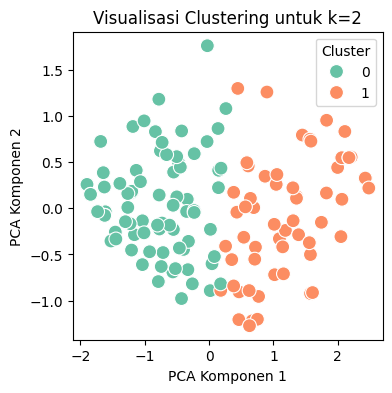

In [20]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_srq_clean)

# Visualisasi hasil clustering
plt.figure(figsize=(4, 4))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette="Set2", s=100)
plt.title(f'Visualisasi Clustering untuk k={best_k}')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.legend(title='Cluster')
plt.show()

In [21]:
# Tambahkan hasil cluster ke dataframe asli (tidak mengubah df asli)
df_clustering_result = df[["NO", "Usia", "Jenis Kelamin"]].copy()
df_clustering_result["TOTAL YA"] = df["TOTAL YA"]
df_clustering_result["Cluster"] = cluster_labels

# Tambahkan hasil PCA jika ingin dipakai di Streamlit
df_clustering_result["PCA_1"] = pca_result[:, 0]
df_clustering_result["PCA_2"] = pca_result[:, 1]

# Simpan ke CSV untuk Streamlit atau analisis lebih lanjut
output_path = "/content/drive/MyDrive/Machine Learning/hasil_clustering.csv"
df_clustering_result.to_csv(output_path, index=False)

In [22]:
model_path = "/content/drive/MyDrive/Machine Learning/kmeans_model.pkl"
joblib.dump(kmeans, model_path)

['/content/drive/MyDrive/Machine Learning/kmeans_model.pkl']

In [23]:
# Mapping ulang cluster agar sesuai cutoff
df['Cluster'] = cluster_labels
cluster_means = df.groupby('Cluster')['TOTAL_YA'].mean()

# Tentukan mana cluster yang = gejala tinggi
cluster_gejala = cluster_means.idxmax()
cluster_normal = cluster_means.idxmin()
print(f"Cluster {cluster_gejala} = bergejala, Cluster {cluster_normal} = normal")

Cluster 1 = bergejala, Cluster 0 = normal


### Deployent

In [24]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [25]:
!ngrok config add-authtoken 2yH2hZyvcNJUhYG7NxPczfaaZYI_79Uxm3qQZAMiYaCHNuaS1

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [26]:
app_code = '''
import pandas as pd
import streamlit as st
import numpy as np
import joblib

st.set_page_config(page_title="Prediksi Cluster SRQ-20", layout="centered")
st.title("🧠 Aplikasi Prediksi Cluster Berdasarkan SRQ-20")

srq_questions = [
    "Apakah anda sering mengalami sakit kepala?",
    "Apakah Anda selalu kurang nafsu makan?",
    "Apakah tidur anda kurang nyenyak?",
    "Apakah anda merasa takut?",
    "Apakah tangan Anda gemetaran?",
    "Apakah anda merasa gugup, tegang, atau khawatir?",
    "Apakah pencernaan Anda kurang baik?",
    "Apakah Anda merasa kesulitan untuk berpikir secara jernih?",
    "Apakah Anda merasa kurang bahagia?",
    "Apakah Anda menangis lebih sering?",
    "Apakah Anda sukar menikmati apa yang Anda lakukan sehari-hari?",
    "Apakah Anda mengalami kesulitan dalam mengambil keputusan?",
    "Apakah pekerjaan sehari-hari terasa sebagai beban yang menyulitkan?",
    "Apakah Anda tidak dapat berguna dalam kehidupan sehari-hari?",
    "Apakah Anda kehilangan minat terhadap berbagai hal?",
    "Apakah Anda merasa sebagai orang yang tidak berharga?",
    "Apakah Anda pernah berpikir mengenai bunuh diri?",
    "Apakah Anda merasa lelah sepanjang waktu?",
    "Apakah Anda mempunyai keluhan tidak nyaman pada bagian perut?",
    "Apakah Anda mudah merasa lelah?"
]

# Input pengguna
user_input = []
st.subheader("📝 Silakan Jawab 20 Pertanyaan Berikut:")
for i, question in enumerate(srq_questions):
    jawaban = st.radio(f"{i+1}. {question}", ["Tidak", "Iya"], horizontal=True, key=str(i))
    nilai = 1 if jawaban == "Iya" else 0
    user_input.append(nilai)

# Tombol prediksi
if st.button("🔍 Prediksi"):
    try:
        input_array = np.array(user_input).reshape(1, -1)
        total_ya = int(sum(user_input))

        # Load model clustering
        model = joblib.load("/content/drive/MyDrive/Machine Learning/kmeans_model.pkl")
        cluster_pred = model.predict(input_array)[0]

        # Mapping hasil cluster berdasarkan analisis di notebook
        cluster_gejala = 1  # cluster dengan rata-rata TOTAL YA tinggi
        cluster_normal = 0  # cluster dengan rata-rata TOTAL YA rendah

        # Tampilkan skor total YA
        st.success(f"✅ TOTAL YA kamu: {total_ya} dari 20 pertanyaan")

        # Interpretasi berdasarkan cutoff WHO
        if total_ya < 6:
            st.info("📘 Berdasarkan cutoff WHO, kamu tergolong **tidak menunjukkan gejala psikologis yang signifikan**.")
        else:
            st.warning("⚠️ Berdasarkan cutoff WHO, terdapat **indikasi adanya gejala psikologis**.")

        # Interpretasi berdasarkan hasil cluster (untuk orang awam)
        if cluster_pred == cluster_normal:
            st.success("🔮 Berdasarkan pola jawaban kamu, sistem mengelompokkan kamu ke dalam kategori **gejala ringan atau normal**.")
        elif cluster_pred == cluster_gejala:
            st.warning("🔮 Berdasarkan pola jawaban kamu, sistem mengelompokkan kamu ke dalam kategori **kemungkinan memiliki gejala psikologis lebih tinggi**.")
        else:
            st.info("ℹ️ Hasil cluster tidak dapat dikenali.")

    except Exception as e:
        st.error(f"❌ Terjadi kesalahan saat memproses prediksi: {e}")
'''

# Simpan ke file app.py
with open("app.py", "w") as f:
    f.write(app_code)

In [27]:
from pyngrok import ngrok

# Jalankan streamlit
!streamlit run app.py &> /content/log.txt &

# Buat URL publik
public_url = ngrok.connect("http://localhost:8501")
print(f" Akses aplikasimu di URL berikut:\n{public_url}")

ERROR:pyngrok.process.ngrok:t=2025-07-02T15:01:59+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.